In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\punith yc\\Downloads\\train.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
df=df.dropna()

In [10]:
df.drop(columns=['title','id','author'],axis=1,inplace=True)

In [11]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
#remove speccial characters and punctuations
df['clean_news']=df['text'].str.lower()

In [14]:
df['clean_news']=df['clean_news'].str.replace('[^a-z0-9\s]',' ')
df['clean_news']=df['clean_news'].str.replace('\n',' ')
df['clean_news']=df['clean_news'].str.replace('\s+',' ')

In [17]:
# remove stop words

from nltk.corpus import stopwords
stop=stopwords.words('english')
df['clean_news']=df['clean_news'].apply(lambda x:" ".join([word for word in x.split() if word not in stop]))
df.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide: didn’t even see comey’s letter...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,"truth might get fired october 29, 2016 tension..."
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\punith
[nltk_data]     yc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

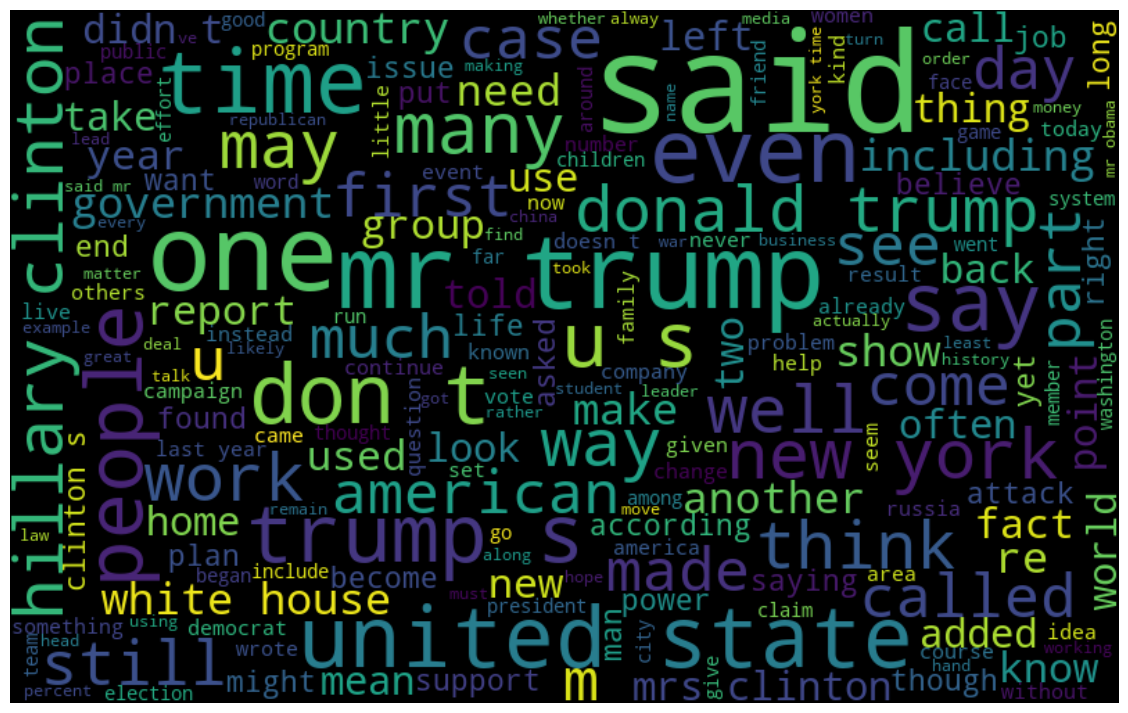

In [19]:
#visualize the frequent words

from wordcloud import WordCloud
all_words=" ".join([sentence for sentence in df['clean_news']])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

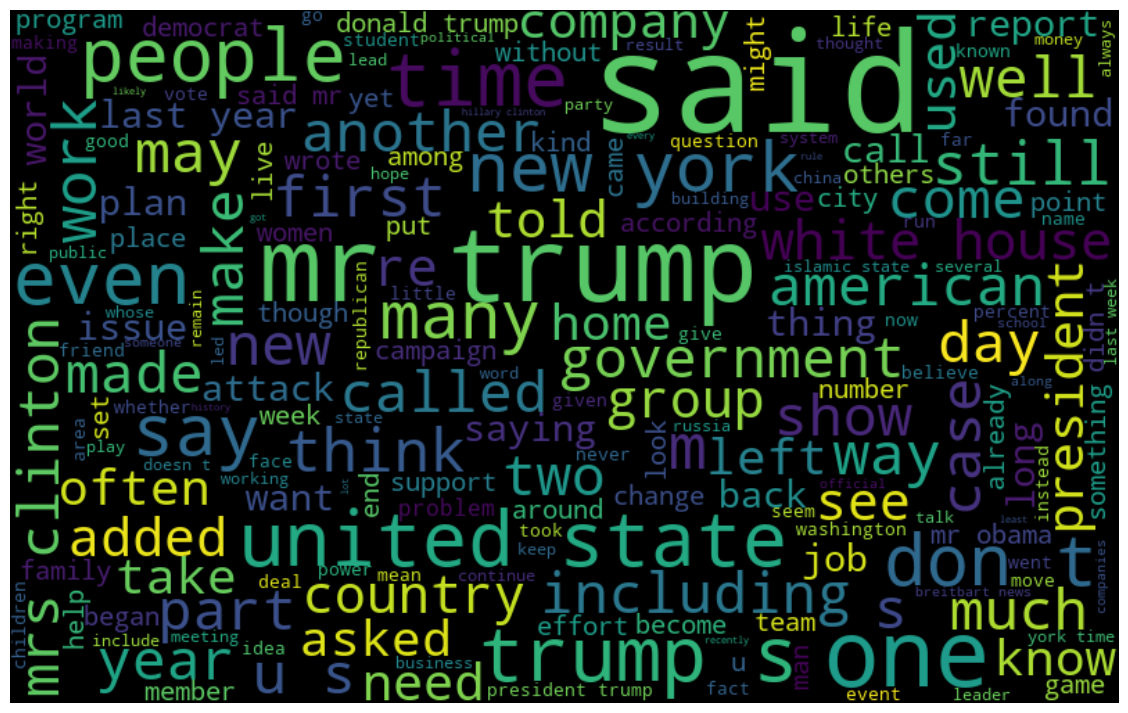

In [21]:
#visualize the frequent words for genuine news

all_words=" ".join([sentence for sentence in df['clean_news'][df['label']==0]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

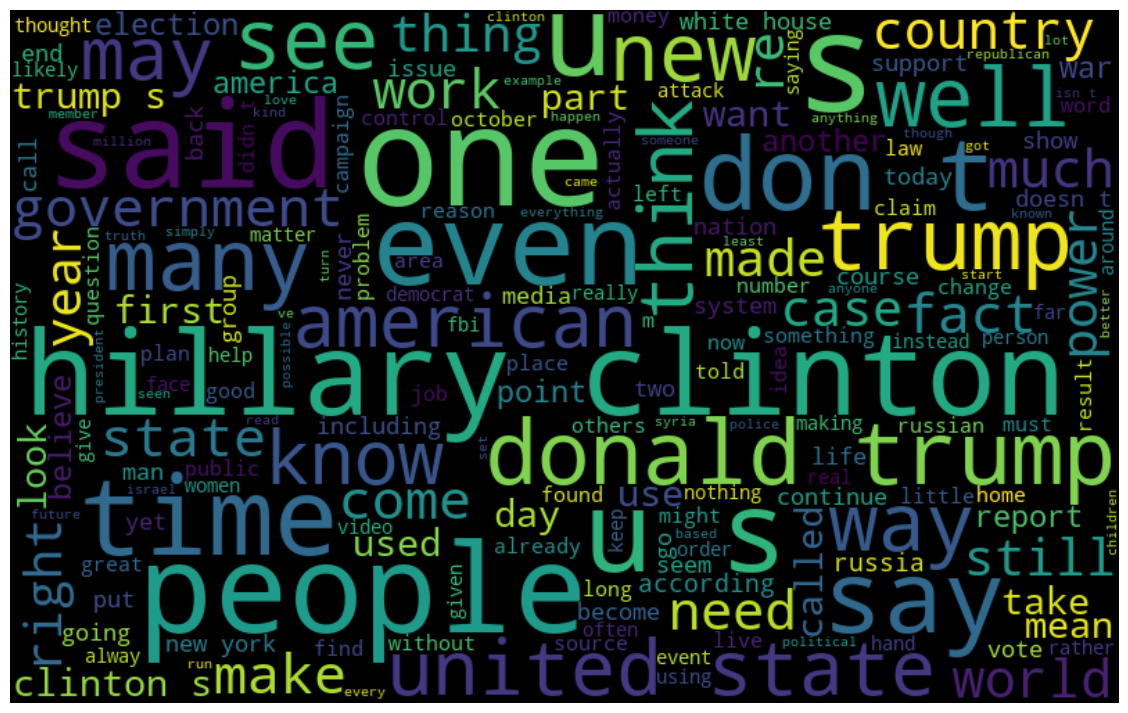

In [22]:
#visualize the frequent words for fake news

all_words=" ".join([sentence for sentence in df['clean_news'][df['label']==1]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()